## Testing QAOAVariationalParams

In [1]:
from openqaoa.qaoa_parameters import create_qaoa_variational_params, QAOACircuitParams, PauliOp, Hamiltonian
from openqaoa.utilities import X_mixer_hamiltonian, qaoa_probabilities
from openqaoa.backends import AccessObjectQiskit,AccessObjectPyQuil
from openqaoa.backends.qaoa_backend import get_qaoa_backend
from openqaoa.backends.simulators.qaoa_vectorized import QAOAvectorizedBackendSimulator

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
terms = [(1,2),(2,3),(0,3),(4,0),(1,),(3,)]
coeffs = [1,2,3,4,3,5]
cost_hamil = Hamiltonian.classical_hamiltonian(terms,coeffs,0)
mixer_hamil = X_mixer_hamiltonian(n_qubits=5)

In [3]:
qaoa_circuit_params = QAOACircuitParams(cost_hamil,mixer_hamil,p=1)
qaoa_circuit_params.qureg

[0, 1, 2, 3, 4]

In [4]:
params1 = create_qaoa_variational_params(qaoa_circuit_params,'fourier','rand',q=1)

In [5]:
backend_obj_qiskit = get_qaoa_backend(qaoa_circuit_params,'qiskit_statevec_simulator')
backend_obj_qiskit_shot = get_qaoa_backend(qaoa_circuit_params,'qiskit_shot_simulator',n_shots=10000)
backend_obj_vect = get_qaoa_backend(qaoa_circuit_params, 'vectorized')

qvm_device = f'{len(qaoa_circuit_params.qureg)}q-qvm'
access_object_pyquil = AccessObjectPyQuil(name = qvm_device, as_qvm=True, execution_timeout = 500)
backend_obj_pyquil = get_qaoa_backend(qaoa_circuit_params, access_object_pyquil, n_shots=500)

In [6]:
cost_hamil.expression

0 + 1Z_{1}Z_{2} + 2Z_{2}Z_{3} + 3Z_{0}Z_{3} + 3Z_{1} + 4Z_{0}Z_{4} + 5Z_{3}

In [7]:
backend_obj_vect.expectation_w_uncertainty(params1)

(1.326326628794787, 7.7620586560007725)

In [8]:
backend_obj_qiskit.expectation(params1)

1.3263266287947881

In [9]:
params1.mixer_1q_angles

array([[-2.03324393, -2.03324393, -2.03324393, -2.03324393, -2.03324393]])

In [10]:
backend_obj_pyquil.expectation(params1)

1.3679999999999994

### Using standard params

In [11]:
params1 = create_qaoa_variational_params(qaoa_circuit_params,'standard','rand')

In [12]:
# Perform sweep
gammas = np.linspace(0, 2*np.pi, 100)
beta = 1.
j=0
costs_qiskit, costs_vect, costs_qiskit_shot, costs_pyquil, = np.zeros((len(gammas))), np.zeros((len(gammas))), np.zeros((len(gammas))), np.zeros((len(gammas)))

for i, gamma in enumerate(gammas):
    print(f"\rRunning {i}/{len(gammas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_qiskit[i] = backend_obj_qiskit.expectation_w_uncertainty(params1)[j]

for i, gamma in enumerate(gammas):
    print(f"\rRunning {i}/{len(gammas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_vect[i] = backend_obj_vect.expectation_w_uncertainty(params1)[j]

for i, gamma in enumerate(gammas):
    print(f"\rRunning {i}/{len(gammas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_qiskit_shot[i] = backend_obj_qiskit_shot.expectation_w_uncertainty(params1)[j]

for i, gamma in enumerate(gammas):
    print(f"\rRunning {i}/{len(gammas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_pyquil[i] = backend_obj_pyquil.expectation_w_uncertainty(params1)[0]

Running 99/100

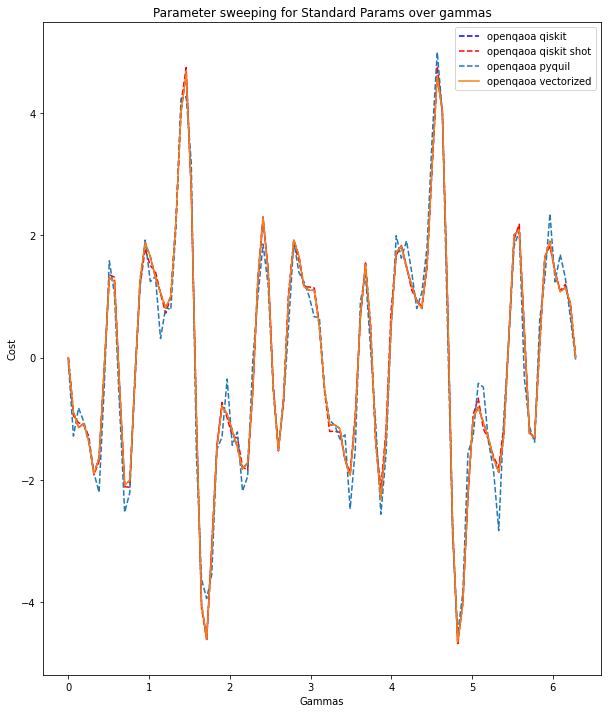

In [13]:
fig = plt.figure(figsize=(10,12))
plt.plot(gammas, costs_qiskit, label = 'openqaoa qiskit', linestyle = '--', color = 'b')
plt.plot(gammas, costs_qiskit_shot, label = 'openqaoa qiskit shot', linestyle = '--', color = 'r')
plt.plot(gammas, costs_pyquil, label = 'openqaoa pyquil', linestyle = '--')
plt.plot(gammas, costs_vect, label = 'openqaoa vectorized', linestyle = '-')

plt.ylabel('Cost')
plt.xlabel('Gammas')
plt.legend()
plt.title('Parameter sweeping for Standard Params over gammas')
plt.show()

In [14]:
# Perform sweep
gamma = 1.7
betas = np.linspace(0, 2*np.pi, 50)

costs_qiskit, costs_vect, costs_qiskit_shot, costs_pyquil, = np.zeros((len(betas))), np.zeros((len(betas))), np.zeros((len(betas))), np.zeros((len(betas)))

for i, beta in enumerate(betas):
    print(f"\rRunning {i}/{len(betas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_qiskit[i] = backend_obj_qiskit.expectation_w_uncertainty(params1)[0]

for i, beta in enumerate(betas):
    print(f"\rRunning {i}/{len(betas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_vect[i] = backend_obj_vect.expectation_w_uncertainty(params1)[0]

for i, beta in enumerate(betas):
    print(f"\rRunning {i}/{len(gammas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_pyquil[i] = backend_obj_pyquil.expectation_w_uncertainty(params1)[0]

for i, beta in enumerate(betas):
    print(f"\rRunning {i}/{len(betas)}", end="")
    args = [beta, gamma]
    
    params1.update_from_raw(args)
    costs_qiskit_shot[i] = backend_obj_qiskit_shot.expectation_w_uncertainty(params1)[0]

Running 49/500

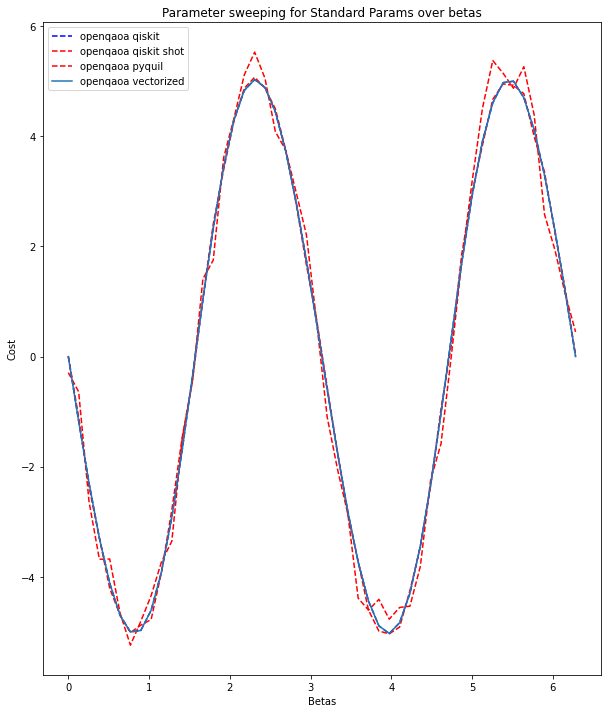

In [15]:
fig = plt.figure(figsize=(10,12))
plt.plot(betas, costs_qiskit, label = 'openqaoa qiskit', linestyle = '--', color = 'b')
plt.plot(betas, costs_qiskit_shot, label = 'openqaoa qiskit shot', linestyle = '--', color = 'r')
plt.plot(betas, costs_pyquil, label = 'openqaoa pyquil', linestyle = '--', color = 'r')
plt.plot(betas, costs_vect, label = 'openqaoa vectorized', linestyle = '-')
plt.ylabel('Cost')
plt.xlabel('Betas')
plt.title('Parameter sweeping for Standard Params over betas')
plt.legend()
plt.show()

### Using fourier params

In [16]:
params1 = create_qaoa_variational_params(qaoa_circuit_params,'fourier','rand',q=1)

In [17]:
# Perform sweep
us = np.linspace(0, 2*np.pi, 100)
v = 4.3
j=0
costs_qiskit, costs_vect, costs_qiskit_shot, costs_pyquil= np.zeros((len(us))), np.zeros((len(us))), np.zeros((len(us))), np.zeros((len(us)))

for i, u in enumerate(us):
    print(f"\rRunning {i}/{len(us)}", end="")
    args = [v, u]
    
    params1.update_from_raw(args)
    costs_qiskit[i] = backend_obj_qiskit.expectation_w_uncertainty(params1)[j]

for i, u in enumerate(us):
    print(f"\rRunning {i}/{len(us)}", end="")
    args = [v, u]
    
    params1.update_from_raw(args)
    costs_vect[i] = backend_obj_vect.expectation_w_uncertainty(params1)[j]

for i, u in enumerate(us):
    print(f"\rRunning {i}/{len(us)}", end="")
    args = [v, u]
    
    params1.update_from_raw(args)
    costs_qiskit_shot[i] = backend_obj_qiskit_shot.expectation_w_uncertainty(params1)[j]

for i, u in enumerate(us):
    print(f"\rRunning {i}/{len(us)}", end="")
    args = [v, u]
    
    params1.update_from_raw(args)
    costs_pyquil[i] = backend_obj_pyquil.expectation_w_uncertainty(params1)[j]

Running 99/100

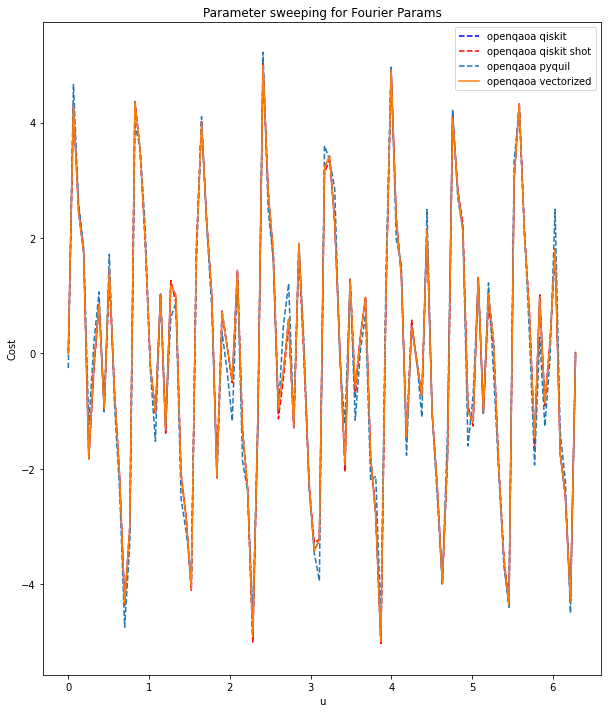

In [18]:
fig = plt.figure(figsize=(10,12))
plt.plot(us, costs_qiskit, label = 'openqaoa qiskit', linestyle = '--', color = 'b')
plt.plot(us, costs_qiskit_shot, label = 'openqaoa qiskit shot', linestyle = '--', color = 'r')
plt.plot(us, costs_pyquil, label = 'openqaoa pyquil', linestyle = '--')
plt.plot(us, costs_vect, label = 'openqaoa vectorized', linestyle = '-')

plt.ylabel('Cost')
plt.xlabel('u')
plt.legend()
plt.title('Parameter sweeping for Fourier Params')
plt.show()